In [1]:
### -----------------------------------------------------------------------------------------------------------###
#                                                                                                                #
#                                     Please Read All the comments ⊂(◉‿◉)                                        #
#                                                                                                                #
###------------------------------------------------------------------------------------------------------------###

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [3]:
### -----------------------------------------------------------------------------------------------------------###
#                                            Perfect Binary Data                                                 #
###------------------------------------------------------------------------------------------------------------###

In [71]:
# draw random independent variable values
x = np.arange(0,150)
# set dependent variable values
y = np.zeros(150)
y[:75] = np.ones(75)

# draw random independent variable values
x_test = np.arange(40,110,3)
# set dependent variable values
y_test = np.zeros(24)
y_test[:12] = np.ones(12)

# to see format of the data uncomment line below
# print(x[:10],'\n',y[:10],'\n',x_test[:10],'\n',y_test[:10])

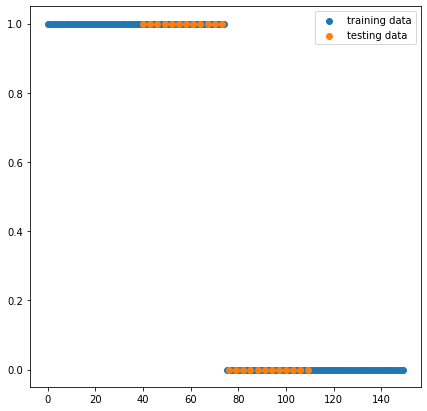

In [72]:
# draw a scatter plot of the x,y and x_test,y_test
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(np.sort(x),y,label='training data')
ax.scatter(np.sort(x_test),y_test,label='testing data')
plt.legend()

In [73]:
# create a suitable format for fit() function
# (just combining points x,y and x_test,y_test)
points = []
for i in range(len(x)):
    points.append([x[i],y[i]])
points = np.array(points)

test = []
for i in range(len(x_test)):
    test.append([x_test[i],y_test[i]])
test = np.array(test)

# to see format of the data uncomment line below
# print(points[:10],'\n\n',test[:10])

In [74]:
reg = LogisticRegression()
reg.fit(points,y)
preds = reg.predict(test)
preds = np.array(preds)

ValueError: x and y must have same first dimension, but have shapes (24, 2) and (48,)

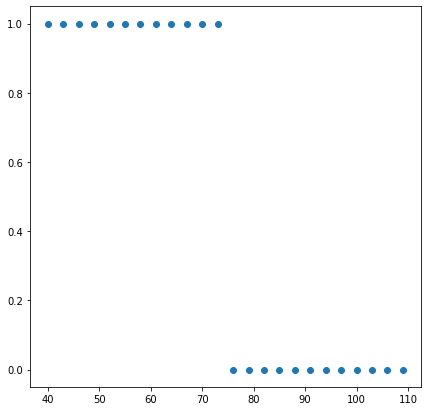

In [88]:
# draw a scatter plot of the x,y and x_test,y_test
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

# ax.scatter(preds,y_test,label='fit',c='green')
# ax.scatter(points[:,0],points[:,1],label='training data')
ax.scatter(test[:,0],test[:,1],label='test data')
loss = expit(test * reg.coef_ + reg.intercept_).ravel()
plt.plot(test, loss, color='red', linewidth=3)

plt.legend()

In [83]:
reg.score(test,preds)

1.0